# Word2Vec

这节通过gensim和pytorch训练日常使用的Word2Vec模型。

## Gensim

In [17]:
import gensim

In [18]:
sentences = [['first', 'sentence'], ['second', 'sentence']]

# 传入文本数据，直接初始化并训练Word2Vec模型
model = gensim.models.Word2Vec(sentences, min_count=1)
model.wv.key_to_index['first']

2

In [19]:
# 词之间的相似度
model.wv.similarity('first', 'second')

-0.023671666

### 例子1：gensim训练英文word2vec模型

gensim下的word2vec模型可以继续训练，下面的例子把常用参数写上：

In [20]:
from gensim.test.utils import common_texts
from gensim.models import Word2Vec

print(common_texts[:200])
model = Word2Vec(sentences=common_texts, vector_size=100,
                 window=5, min_count=1, workers=4)
model

[['human', 'interface', 'computer'], ['survey', 'user', 'computer', 'system', 'response', 'time'], ['eps', 'user', 'interface', 'system'], ['system', 'human', 'system', 'eps'], ['user', 'response', 'time'], ['trees'], ['graph', 'trees'], ['graph', 'minors', 'trees'], ['graph', 'minors', 'survey']]


In [21]:
model.save("word2vec.model")

# 先保存，再继续接力训练
model = Word2Vec.load("word2vec.model")
model.train([["hello", "world"]], total_examples=1, epochs=1)
model

In [22]:
vector1 = model.wv['computer']  # get numpy vector of a word
vector1

array([-0.00515774, -0.00667028, -0.0077791 ,  0.00831315, -0.00198292,
       -0.00685696, -0.0041556 ,  0.00514562, -0.00286997, -0.00375075,
        0.0016219 , -0.0027771 , -0.00158482,  0.0010748 , -0.00297881,
        0.00852176,  0.00391207, -0.00996176,  0.00626142, -0.00675622,
        0.00076966,  0.00440552, -0.00510486, -0.00211128,  0.00809783,
       -0.00424503, -0.00763848,  0.00926061, -0.00215612, -0.00472081,
        0.00857329,  0.00428458,  0.0043261 ,  0.00928722, -0.00845554,
        0.00525685,  0.00203994,  0.0041895 ,  0.00169839,  0.00446543,
        0.00448759,  0.0061063 , -0.00320303, -0.00457706, -0.00042664,
        0.00253447, -0.00326412,  0.00605948,  0.00415534,  0.00776685,
        0.00257002,  0.00811904, -0.00138761,  0.00808028,  0.0037181 ,
       -0.00804967, -0.00393476, -0.0024726 ,  0.00489447, -0.00087241,
       -0.00283173,  0.00783599,  0.00932561, -0.0016154 , -0.00516075,
       -0.00470313, -0.00484746, -0.00960562,  0.00137242, -0.00

In [23]:
sims = model.wv.most_similar('computer', topn=10)  # get other similar words
sims

[('system', 0.21617142856121063),
 ('survey', 0.044689200818538666),
 ('interface', 0.01520337350666523),
 ('time', 0.0019510575802996755),
 ('trees', -0.03284314647316933),
 ('human', -0.0742427185177803),
 ('response', -0.09317588806152344),
 ('graph', -0.09575346857309341),
 ('eps', -0.10513805598020554),
 ('user', -0.16911622881889343)]

仅仅保存模型训练好的词向量键值对，通过 `KeyedVectors` 快速加载到内存，计算词的向量值：

In [24]:
from gensim.models import KeyedVectors
# Store just the words + their trained embeddings.
word_vectors = model.wv
word_vectors.save("word2vec.wordvectors")
# Load back with memory-mapping = read-only, shared across processes.
wv = KeyedVectors.load("word2vec.wordvectors", mmap='r')
vector2 = wv['computer']  # Get numpy vector of a word
vector2

array([-0.00515774, -0.00667028, -0.0077791 ,  0.00831315, -0.00198292,
       -0.00685696, -0.0041556 ,  0.00514562, -0.00286997, -0.00375075,
        0.0016219 , -0.0027771 , -0.00158482,  0.0010748 , -0.00297881,
        0.00852176,  0.00391207, -0.00996176,  0.00626142, -0.00675622,
        0.00076966,  0.00440552, -0.00510486, -0.00211128,  0.00809783,
       -0.00424503, -0.00763848,  0.00926061, -0.00215612, -0.00472081,
        0.00857329,  0.00428458,  0.0043261 ,  0.00928722, -0.00845554,
        0.00525685,  0.00203994,  0.0041895 ,  0.00169839,  0.00446543,
        0.00448759,  0.0061063 , -0.00320303, -0.00457706, -0.00042664,
        0.00253447, -0.00326412,  0.00605948,  0.00415534,  0.00776685,
        0.00257002,  0.00811904, -0.00138761,  0.00808028,  0.0037181 ,
       -0.00804967, -0.00393476, -0.0024726 ,  0.00489447, -0.00087241,
       -0.00283173,  0.00783599,  0.00932561, -0.0016154 , -0.00516075,
       -0.00470313, -0.00484746, -0.00960562,  0.00137242, -0.00

In [25]:
compare = vector1 == vector2
compare.all()

True

向量结果是一样的。

### 例子2：gensim训练中文word2vec模型

In [26]:
txt_path = 'data/C000008_test.txt'
sentences = open(txt_path, 'r', encoding='utf-8').read().split()
sentences[:10]

['1,本报记者', '发自', '上海', '国外', '媒体', '昨日', '报道', '澳大利亚', '银行', 'acq']

In [27]:
model = gensim.models.Word2Vec(
    sentences, vector_size=50, window=5, min_count=1, workers=4)
model.save('C000008.word2vec.model')
model.wv.key_to_index

{'0': 0,
 '2': 1,
 '国': 2,
 '1': 3,
 '新': 4,
 '计': 5,
 '学': 6,
 '浪': 7,
 '年': 8,
 '品': 9,
 '化': 10,
 '地': 11,
 '9': 12,
 '中': 13,
 '3': 14,
 '月': 15,
 '告': 16,
 '5': 17,
 '市': 18,
 '会': 19,
 '妆': 20,
 '广': 21,
 '美': 22,
 '日': 23,
 '了': 24,
 '资': 25,
 '划': 26,
 '上': 27,
 '大': 28,
 '售': 29,
 '家': 30,
 '球': 31,
 '业': 32,
 '产': 33,
 '科': 34,
 '是': 35,
 'a': 36,
 '任': 37,
 '网': 38,
 '不': 39,
 '海': 40,
 '皮': 41,
 '成': 42,
 '销': 43,
 '片': 44,
 '碎': 45,
 '行': 46,
 'c': 47,
 '本': 48,
 '最': 49,
 ',': 50,
 '的': 51,
 '作': 52,
 '对': 53,
 '投': 54,
 '金': 55,
 '首': 56,
 '改': 57,
 '报': 58,
 '场': 59,
 '物': 60,
 '发': 61,
 '4': 62,
 '定': 63,
 '肤': 64,
 '此': 65,
 '间': 66,
 '人': 67,
 '道': 68,
 '推': 69,
 '在': 70,
 '有': 71,
 '出': 72,
 '预': 73,
 '务': 74,
 '星': 75,
 '财': 76,
 '门': 77,
 '很': 78,
 '外': 79,
 '能': 80,
 '可': 81,
 '商': 82,
 '公': 83,
 '彗': 84,
 '者': 85,
 '主': 86,
 '7': 87,
 '提': 88,
 '6': 89,
 '记': 90,
 'e': 91,
 '客': 92,
 '银': 93,
 '长': 94,
 '利': 95,
 '运': 96,
 '无': 97,
 '席': 98,
 '司': 99,
 '斯': 100,

In [28]:
# key index
print(model.wv.key_to_index['中'])
print(model.wv.key_to_index['国'])

# word vector
print(model.wv['中'])
print(model.wv['国'])

# compare two word
print(model.wv.similarity('中', '国'))

13
2
[-0.00053027 -0.01772034 -0.01729597  0.00551262 -0.01634411 -0.01812631
 -0.00465787 -0.01715032 -0.01424615 -0.01683745 -0.00062639 -0.00916422
  0.01332476  0.00310874 -0.00671583  0.0122374  -0.01194778 -0.00932974
 -0.01450647 -0.00872624 -0.00364894  0.01293392 -0.00544875  0.00974224
  0.01378791 -0.01489253  0.00917371  0.01216756 -0.00599503  0.01327628
  0.01229911 -0.01291231 -0.01361843  0.00506372 -0.00330544 -0.01204352
  0.01908204 -0.01015853 -0.01309691 -0.00033633 -0.00530213  0.00090206
 -0.00703516 -0.00088255 -0.00120572  0.0017895   0.01640807 -0.0114736
 -0.00324582  0.01102903]
[-0.01728148  0.00725195  0.01035777  0.01143742  0.01492074 -0.01233465
  0.00225755  0.01225201 -0.00569521 -0.01232812 -0.0008328  -0.01689142
 -0.01119552  0.01432066  0.00672672  0.01455739  0.01359155  0.01495036
 -0.0075868  -0.0011372   0.00465343 -0.00911832  0.01693124 -0.01990392
  0.01367336  0.00595653 -0.00975271  0.00873796 -0.00350521  0.01348927
  0.02003421 -0.00871

## PyTorch

演示使用pytorch训练skip-gram的word2vec模型，比上一节的论文实现简化一些。

In [29]:
import matplotlib.pyplot as plt
import torch.optim as optim
import torch.nn as nn
import torch
import numpy as np
import os

os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"


def random_batch():
    random_inputs = []
    random_labels = []
    random_index = np.random.choice(
        range(len(skip_grams)), batch_size, replace=False)

    for i in random_index:
        random_inputs.append(np.eye(voc_size)[skip_grams[i][0]])  # target
        random_labels.append(skip_grams[i][1])  # context word

    return random_inputs, random_labels


class Word2Vec(nn.Module):
    # Model
    def __init__(self):
        super(Word2Vec, self).__init__()
        # W and WT is not Traspose relationship
        # voc_size > embedding_size Weight
        self.W = nn.Linear(voc_size, embedding_size, bias=False)
        # embedding_size > voc_size Weight
        self.WT = nn.Linear(embedding_size, voc_size, bias=False)

    def forward(self, X):
        # X : [batch_size, voc_size]
        hidden_layer = self.W(X)  # hidden_layer : [batch_size, embedding_size]
        # output_layer : [batch_size, voc_size]
        output_layer = self.WT(hidden_layer)
        return output_layer

定义参数，开始训练：

Epoch: 1000 cost = 1.848542
Epoch: 2000 cost = 0.810490
Epoch: 3000 cost = 0.796008
Epoch: 4000 cost = 0.943773
Epoch: 5000 cost = 1.068257
Epoch: 6000 cost = 1.448530
Epoch: 7000 cost = 1.019352
Epoch: 8000 cost = 0.759462
Epoch: 9000 cost = 0.968722


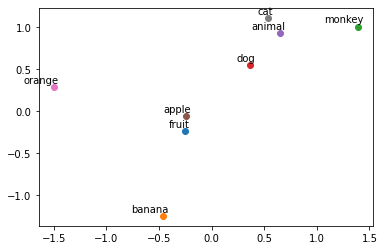

In [30]:
batch_size = 2  # mini-batch size
embedding_size = 10  # embedding size

sentences = ["apple banana fruit", "banana orange fruit", "orange banana fruit",
             "dog cat animal", "cat monkey animal", "monkey dog animal"]

word_sequence = " ".join(sentences).split()
word_list = " ".join(sentences).split()
word_list = list(set(word_list))
word_dict = {w: i for i, w in enumerate(word_list)}
voc_size = len(word_list)

# Make skip gram of one size window
skip_grams = []
for i in range(1, len(word_sequence) - 1):
    target = word_dict[word_sequence[i]]
    context = [word_dict[word_sequence[i - 1]],
               word_dict[word_sequence[i + 1]]]
    for w in context:
        skip_grams.append([target, w])

model = Word2Vec()

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training
for epoch in range(9000):
    input_batch, target_batch = random_batch()
    input_batch = torch.Tensor(input_batch)
    target_batch = torch.LongTensor(target_batch)

    optimizer.zero_grad()
    output = model(input_batch)

    # output : [batch_size, voc_size], target_batch : [batch_size] (LongTensor, not one-hot)
    loss = criterion(output, target_batch)
    if (epoch + 1) % 1000 == 0:
        print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.6f}'.format(loss))

    loss.backward()
    optimizer.step()

for i, label in enumerate(word_list):
    W, WT = model.parameters()
    x, y = W[0][i].item(), W[1][i].item()
    plt.scatter(x, y)
    plt.annotate(label, xy=(x, y), xytext=(5, 2),
                 textcoords='offset points', ha='right', va='bottom')
plt.show()

In [31]:
import os
os.remove('word2vec.model')
os.remove('word2vec.wordvectors')
os.remove('C000008.word2vec.model')

本节完。